        E:\Data\FinalResults\Dsp\0851 - Example Single Lap Neural Trajectory With KMeans Distances is already existed!
24


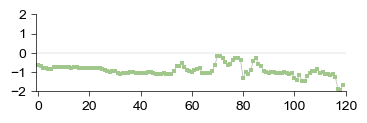

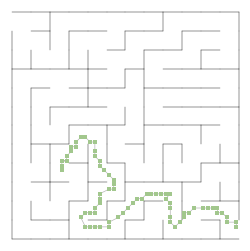

In [36]:
from mylib.statistic_test import *

code_id = "0851 - Example Single Lap Neural Trajectory With KMeans Distances"
loc = join(figpath, "Dsp", code_id)
mkdir(loc)

dir_name0 = join(figpath, "Dsp", "0844 - Manifold of Initialization")
dir_name1 = join(figpath, "Dsp", "0850 - Lisa Paper Revisits")

def get_transient_map(mouse: int):
    if exists(join(dir_name1, f"transient_{mouse}.pkl")):
        with open(join(dir_name1, f"transient_{mouse}.pkl"), "rb") as f:
            return pickle.load(f)
    else:
        raise FileNotFoundError(
            f"Please run Fig0850 - Lisa Paper Revisits.ipynb first "
            f"to generate transient_{mouse}.pkl"
        )
        
if __name__ == '__main__':
    from sklearn.decomposition import PCA
    from umap.umap_ import UMAP
    from sklearn.svm import SVC
    
    mouse = 10232
    (
        kmeans_dist_traj, 
        neural_traj, 
        session_traj, 
        old_pos_traj, 
        route_traj, 
        lap_traj, 
        pos_traj, 
        speed_traj
    ) = get_transient_map(mouse)
    
    """
    pca = PCA(n_components=30)
    denoised_data = pca.fit_transform(neural_traj.T)
    model = UMAP(n_components=3)
    reduced_data = model.fit_transform(denoised_data)
    PC1, PC2, PC3 = reduced_data[:, 0], reduced_data[:, 1], reduced_data[:, 2]
    """
    
    beg = np.concatenate([[0], np.where(np.ediff1d(lap_traj)!=0)[0]+1])
    end = np.concatenate([np.where(np.ediff1d(lap_traj)!=0)[0]+1, [lap_traj.shape[0]]])
    
    for i in range(24, 25):
        plt.figure(figsize=(4, 1))
        ax = Clear_Axes(plt.axes(), close_spines=['top', 'right'], ifxticks=True, ifyticks=True)
        ax.plot(
            np.arange(end[i] - beg[i]),
            kmeans_dist_traj[beg[i]:end[i]],
            lw=0.5,
            color='#B5B5B6'
        )
        idx0 = np.where(kmeans_dist_traj[beg[i]:end[i]] > 0)[0]
        ax.plot(
            np.arange(end[i] - beg[i])[idx0],
            kmeans_dist_traj[beg[i]:end[i]][idx0],
            's',
            markeredgewidth=0,
            markersize=2.5,
            linewidth=0.5,
            color='#28306E'
        )
        idx1 = np.where(kmeans_dist_traj[beg[i]:end[i]] < 0)[0]
        ax.plot(
            np.arange(end[i] - beg[i])[idx1],
            kmeans_dist_traj[beg[i]:end[i]][idx1],
            's',
            markeredgewidth=0,
            markersize=2.5,
            linewidth=0.5,
            color='#A2C78D'
        )
        print(i)
        ax.axhline(0, color='k', linewidth=0.1, ls='--')
        ax.set_xlim([-1, end[i]-beg[i]])
        ax.set_yticks(np.linspace(-2, 2, 5)) 
        ax.set_ylim(-2, 2)
        plt.savefig(join(loc, f"Example Lap S{session_traj[beg[i]]} Lap {i+1}.png"), dpi=600)
        plt.savefig(join(loc, f"Example Lap S{session_traj[beg[i]]} Lap {i+1}.svg"), dpi=600)
        plt.show()
        
def plot_maze(i):
    dist_clusters = kmeans_dist_traj
    plt.figure(figsize=(3, 3))
    ax = Clear_Axes(plt.axes())
    DrawMazeProfile(axes=ax, color='k', linewidth=0.3)
    x, y = pos_traj[beg[i]:end[i]]%48, pos_traj[beg[i]:end[i]]//48
    
    if 1:
        ax.plot(
            x,
            y,
            lw=0.5,
            color='#B5B5B6'
        )
        idx0 = np.where(kmeans_dist_traj[beg[i]:end[i]] > 0)[0]
        ax.plot(
            x[idx0],
            y[idx0],
            's',
            markeredgewidth=0,
            markersize=2.5,
            linewidth=0.5,
            color='#28306E'
        )
        idx1 = np.where(kmeans_dist_traj[beg[i]:end[i]] < 0)[0]
        ax.plot(
            x[idx1],
            y[idx1],
            's',
            markeredgewidth=0,
            markersize=2.5,
            linewidth=0.5,
            color='#A2C78D'
        )
    ax.set_aspect("equal")
    ax.invert_yaxis()
    plt.savefig(join(loc, f"Example Map Transition [session {session_traj[beg[i]]+1}-Route {route_traj[beg[i]]}-Lap {i}] Maze.png"), dpi=600)
    plt.savefig(join(loc, f"Example Map Transition [session {session_traj[beg[i]]+1}-Route {route_traj[beg[i]]}-Lap {i}] Maze.svg"), dpi=600)
    plt.show()

nlap = 24
plot_maze(nlap)

In [37]:
pca = PCA(n_components=30)
denoised_data = pca.fit_transform(neural_traj.T)
model = UMAP(n_components=3)
reduced_data = model.fit_transform(denoised_data)
PC1, PC2, PC3 = reduced_data[:, 0], reduced_data[:, 1], reduced_data[:, 2] 

svm = SVC()
svm.fit(reduced_data[:, :3], np.where(kmeans_dist_traj>0, 0, 1))

map_clusters = svm.predict(reduced_data[:, :3])

638 Laps total


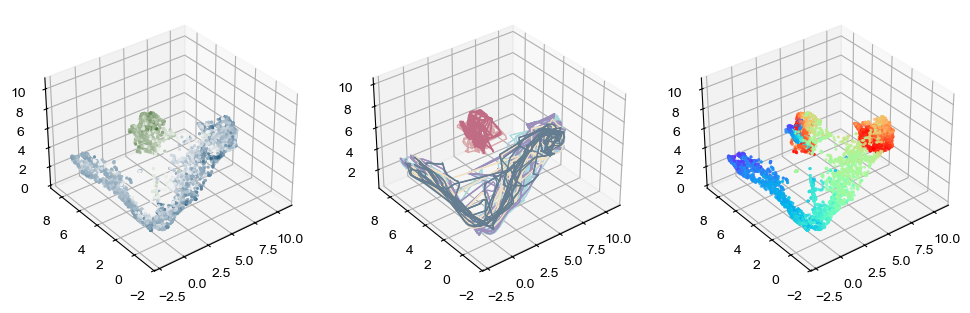

In [54]:
if 1:
    elev, azim = 33, -128
    
    # Each route select 10 laps
    selected_beg, selected_end = [], []
    for route in range(7):
        for day in range(7):
            idx = np.where((route_traj[beg] == route)&(session_traj[beg]))[0]
            try:
                selected_idx = np.random.choice(idx, 5, replace = False)
            except:
                selected_idx = idx
            selected_beg.append(beg[selected_idx])
            selected_end.append(end[selected_idx])
        
    selected_beg, selected_end = np.concatenate(selected_beg), np.concatenate(selected_end)
    
    print(f"{beg.shape[0]} Laps total")
    session_colors2 = sns.color_palette("rainbow", 7)
    exclude_idx = []
    
    dist_signs = np.where(kmeans_dist_traj > 0, 1, 0)
    
    fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(12, 4), subplot_kw={'projection': '3d'})
    ax = axes[0]
    ax1 = axes[1]
    ax2 = axes[2]
    
    colors = palette = sns.diverging_palette(h_neg=120, h_pos=240, s=80, l=38, as_cmap=True, sep=20)(np.clip((kmeans_dist_traj + 2)/4, 0, 1-1e-8))
    
    D = GetDMatrices(1, 48)
    dist_traj = D[pos_traj, 2303]
    dist_colors = plt.get_cmap("rainbow")(dist_traj/np.max(dist_traj))
    
    for i in range(selected_beg.shape[0]):
        beg_idx, end_idx = selected_beg[i], selected_end[i]
        if np.unique(map_clusters[beg_idx:end_idx]).shape[0] == 2:
            exclude_idx.append(i)
            continue

        ax.scatter( 
            PC1[beg_idx:end_idx], 
            PC2[beg_idx:end_idx], 
            PC3[beg_idx:end_idx],
            color=colors[beg_idx:end_idx],
            s=5,
            alpha=0.8,
            linewidth = 0
        )
        ax1.plot(PC1[beg_idx:end_idx], PC2[beg_idx:end_idx], PC3[beg_idx:end_idx], linewidth=1, color = DSPPalette[route_traj[beg_idx]])
        ax2.scatter( 
            PC1[beg_idx:end_idx], 
            PC2[beg_idx:end_idx], 
            PC3[beg_idx:end_idx],
            color=dist_colors[beg_idx:end_idx, :],
            s=5,
            alpha=0.8,
            linewidth = 0
        )   
    ax.view_init(elev=elev, azim=azim)
    ax1.view_init(elev=elev, azim=azim)
    ax2.view_init(elev=elev, azim=azim)
    plt.savefig(join(loc, f"{mouse} [example].png"), dpi=600)
    plt.savefig(join(loc, f"{mouse} [example].svg"), dpi=600)
    plt.show()

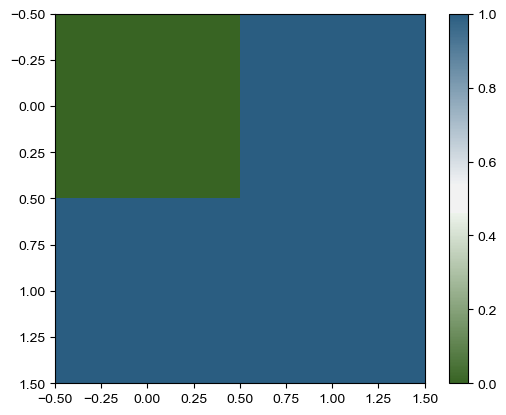

In [61]:
palette = sns.diverging_palette(
    h_neg=120, h_pos=240, s=80, l=38, 
    as_cmap=True, sep=20
)

mat = np.ones((2, 2))
mat[0, 0] = 0

plt.imshow(mat, cmap=palette)
plt.colorbar()
plt.savefig(join(loc, "colorbar.png"), dpi=600)
plt.savefig(join(loc, "colorbar.svg"), dpi=600)
plt.show()